In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv


In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv


In [3]:
data = pd.read_csv("/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv")
data.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [4]:
data.shape

(6340, 219)

In [5]:
data.columns.values

array(['group', 'grand_tot_interests', 'interest1', 'interest2',
       'interest3', 'interest4', 'interest5', 'interest6', 'interest7',
       'interest8', 'interest9', 'interest10', 'interest11', 'interest12',
       'interest13', 'interest14', 'interest15', 'interest16',
       'interest17', 'interest18', 'interest19', 'interest20',
       'interest21', 'interest22', 'interest23', 'interest24',
       'interest25', 'interest26', 'interest27', 'interest28',
       'interest29', 'interest30', 'interest31', 'interest32',
       'interest33', 'interest34', 'interest35', 'interest36',
       'interest37', 'interest38', 'interest39', 'interest40',
       'interest41', 'interest42', 'interest43', 'interest44',
       'interest45', 'interest46', 'interest47', 'interest48',
       'interest49', 'interest50', 'interest51', 'interest52',
       'interest53', 'interest54', 'interest55', 'interest56',
       'interest57', 'interest58', 'interest59', 'interest60',
       'interest61', 'interest62

In [6]:
data.dtypes

group                   object
grand_tot_interests      int64
interest1              float64
interest2              float64
interest3              float64
                        ...   
interest213            float64
interest214            float64
interest215            float64
interest216            float64
interest217            float64
Length: 219, dtype: object

### Para este análisis se eliminará la columna grand_tot_interests que indica la cantidad total de intereses marcados por esa persona.

In [7]:
data.drop(["grand_tot_interests"], axis=1, inplace=True)

### Identificar aquellas variables con más del 95% de valores nulos.

In [8]:
null_count = pd.DataFrame(data.isnull().sum(), columns=["count"])
null_count

,count
group,0
interest1,5347
interest2,6339
interest3,6305
interest4,6315
...,...
interest213,6338
interest214,6268
interest215,1397
interest216,2282


In [9]:
null_percent = pd.DataFrame(data.isnull().sum()/len(data), columns=["percent"])
null_percent

,percent
group,0.000000
interest1,0.843375
interest2,0.999842
interest3,0.994479
interest4,0.996057
...,...
interest213,0.999685
interest214,0.988644
interest215,0.220347
interest216,0.359937


In [10]:
null_table_count = pd.concat([null_count,null_percent],axis=1)
null_table_count

,count,percent
group,0,0.000000
interest1,5347,0.843375
interest2,6339,0.999842
interest3,6305,0.994479
interest4,6315,0.996057
...,...,...
interest213,6338,0.999685
interest214,6268,0.988644
interest215,1397,0.220347
interest216,2282,0.359937


In [11]:
null_percent_above_ninety = null_table_count[null_table_count["percent"]>0.95]
null_percent_above_ninety

,count,percent
interest2,6339,0.999842
interest3,6305,0.994479
interest4,6315,0.996057
interest7,6339,0.999842
interest8,6247,0.985331
...,...,...
interest208,6222,0.981388
interest209,6230,0.982650
interest213,6338,0.999685
interest214,6268,0.988644


### Identificar las filas con variables de intereses todas nulas.

In [12]:
data.duplicated().sum()

159

In [13]:
data[data.duplicated()]

,group,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
8,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6136,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6206,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6294,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_group = data.groupby("group")
data_group.count()

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
group,,,,,,,,,,,,,,,,,,,,,
C,280,0,17,10,305,859,0,24,84,1,...,33,65,1276,484,194,1,61,1255,997,48
I,329,1,8,6,226,1032,0,37,101,0,...,27,19,1528,810,315,1,4,1546,1345,19
P,201,0,4,4,189,888,1,19,67,0,...,36,11,1390,843,246,0,5,1350,1139,41
R,183,0,6,5,78,615,0,13,81,0,...,22,15,843,337,122,0,2,792,577,39


In [15]:
for col in data.columns:
    print(data[col].unique())
    print()

['C' 'P' 'R' 'I']

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[ 1. nan  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[ 1. nan  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[ 1. nan  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[ 1. nan  2.]

[nan  1.  2.]

[nan  1.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[ 1. nan  2.]

[ 1. nan  2.]

[ 1. nan  2.]

[nan  1.]

[ 1. nan  2.]

[nan  1.  2.]

[nan  1.  2.]

[ 1. nan  2.]

[nan  1.]

[ 1. nan  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.  2.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.]

[nan  1.  2.]

[nan  1.  2.]

[ 1. nan  2.]

[

### Eliminar las filas con las variables de intereses todas nulas y eliminar las variables de intereses con más del 95% de valores nulos.

In [16]:
data = data[~data.duplicated()]
data.shape

(6181, 218)

In [17]:
np.array(null_percent_above_ninety.index)

array(['interest2', 'interest3', 'interest4', 'interest7', 'interest8',
       'interest10', 'interest11', 'interest13', 'interest18',
       'interest19', 'interest20', 'interest23', 'interest24',
       'interest25', 'interest26', 'interest27', 'interest28',
       'interest29', 'interest30', 'interest31', 'interest32',
       'interest33', 'interest34', 'interest35', 'interest36',
       'interest37', 'interest38', 'interest39', 'interest42',
       'interest45', 'interest46', 'interest50', 'interest53',
       'interest55', 'interest56', 'interest67', 'interest68',
       'interest69', 'interest72', 'interest73', 'interest74',
       'interest75', 'interest76', 'interest85', 'interest86',
       'interest87', 'interest91', 'interest93', 'interest94',
       'interest95', 'interest96', 'interest98', 'interest99',
       'interest100', 'interest101', 'interest102', 'interest103',
       'interest105', 'interest106', 'interest107', 'interest108',
       'interest111', 'interest113', '

In [18]:
data.drop(np.array(null_percent_above_ninety.index),axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Análisis de la variable group.

In [19]:
data_group_clean = data.groupby("group")
data_group_clean.count()

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest189,interest196,interest200,interest201,interest202,interest210,interest211,interest212,interest215,interest216
group,,,,,,,,,,,,,,,,,,,,,
C,280,305,859,84,1210,86,455,1215,109,1015,...,914,559,905,307,430,1276,484,194,1255,997
I,329,226,1032,101,1235,111,545,1218,85,1287,...,1021,52,1474,1149,520,1528,810,315,1546,1345
P,201,189,888,67,1246,100,559,1249,83,1108,...,955,44,439,97,378,1390,843,246,1350,1139
R,183,78,615,81,825,68,333,823,60,684,...,582,42,505,118,311,843,337,122,792,577


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data_group_clean.size()

group
C    1662
I    1780
P    1697
R    1042
dtype: int64

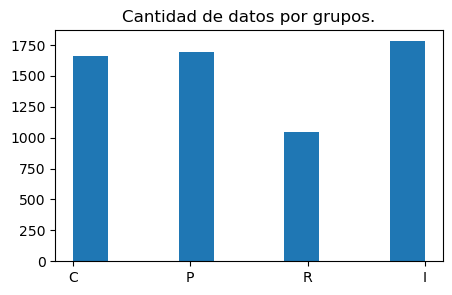

In [22]:
plt.figure(figsize=(5,3))
plt.hist(data["group"])
plt.title("Cantidad de datos por grupos.")
plt.show()

* #### La columna group define 4 grupos de personas.
* #### Se observa que la categoría R de personas es la que menor cantidad de datos tiene.

In [23]:
percent_group = data_group_clean.size().div(data_group_clean.size().sum(axis=0),axis=0)
percent_group

group
C    0.268889
I    0.287979
P    0.274551
R    0.168581
dtype: float64

In [24]:
data = data.fillna(0)

In [25]:
data.shape

(6181, 89)

### Análisis de la cantidad de intereses por grupos.

In [26]:
data.groupby("group").mean()

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest189,interest196,interest200,interest201,interest202,interest210,interest211,interest212,interest215,interest216
group,,,,,,,,,,,,,,,,,,,,,
C,0.168472,0.183514,0.517449,0.051143,0.728640,0.051745,0.273767,0.731649,0.065584,0.611312,...,0.550542,0.336342,0.545728,0.184717,0.259326,0.768953,0.291817,0.117329,0.755114,0.599880
I,0.184831,0.126966,0.579775,0.056742,0.693820,0.062360,0.306180,0.684270,0.047753,0.723034,...,0.573596,0.029213,0.828090,0.645506,0.292135,0.858427,0.455056,0.176966,0.868539,0.755618
P,0.118444,0.111962,0.523866,0.039481,0.734826,0.058928,0.329405,0.736594,0.048910,0.653506,...,0.563347,0.025928,0.258692,0.057160,0.223335,0.819682,0.497348,0.145551,0.796111,0.671774
R,0.175624,0.074856,0.590211,0.077735,0.791747,0.065259,0.319578,0.789827,0.057582,0.656430,...,0.558541,0.040307,0.484645,0.113244,0.298464,0.809021,0.323417,0.117083,0.760077,0.553743


In [27]:
interest_data_plot = data.groupby("group").sum()
interest_data_plot

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest189,interest196,interest200,interest201,interest202,interest210,interest211,interest212,interest215,interest216
group,,,,,,,,,,,,,,,,,,,,,
C,280.0,305.0,860.0,85.0,1211.0,86.0,455.0,1216.0,109.0,1016.0,...,915.0,559.0,907.0,307.0,431.0,1278.0,485.0,195.0,1255.0,997.0
I,329.0,226.0,1032.0,101.0,1235.0,111.0,545.0,1218.0,85.0,1287.0,...,1021.0,52.0,1474.0,1149.0,520.0,1528.0,810.0,315.0,1546.0,1345.0
P,201.0,190.0,889.0,67.0,1247.0,100.0,559.0,1250.0,83.0,1109.0,...,956.0,44.0,439.0,97.0,379.0,1391.0,844.0,247.0,1351.0,1140.0
R,183.0,78.0,615.0,81.0,825.0,68.0,333.0,823.0,60.0,684.0,...,582.0,42.0,505.0,118.0,311.0,843.0,337.0,122.0,792.0,577.0


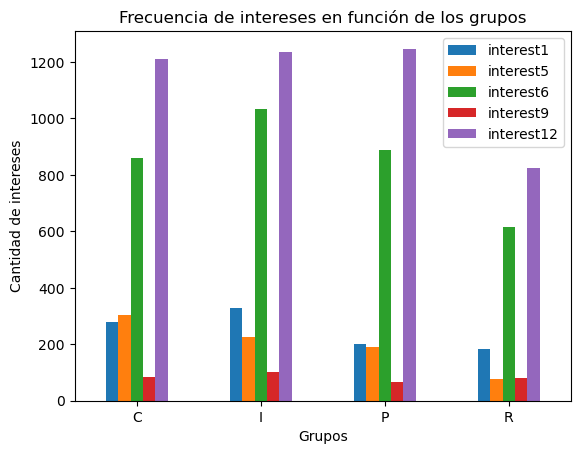

In [28]:
interest_data_plot[interest_data_plot.columns[:5]].plot(kind="bar")
plt.title("Frecuencia de intereses en función de los grupos")
plt.xlabel("Grupos")
plt.ylabel("Cantidad de intereses")
plt.xticks(rotation=0)
plt.show()

* #### Para llevar a cabo el modelo:
    * #### Transformar la variable categórica group a variables dummies.
    * #### No hace falta normalizar los datos ya que únicamente son 0, 1 y 2.

In [29]:
dummy_group = pd.get_dummies(data["group"], prefix="group")
data.drop(["group"],axis=1,inplace=True)
data = pd.concat([data.astype("int"), dummy_group],axis=1)
data

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest202,interest210,interest211,interest212,interest215,interest216,group_C,group_I,group_P,group_R
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,1,1,0,0,0
2,0,0,0,0,1,0,0,1,0,1,...,1,1,0,0,1,1,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,0,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,0,0
6336,0,0,1,0,1,0,1,1,0,1,...,0,1,0,0,1,1,0,1,0,0
6337,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
6338,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,1,0,1,0,0


### K-Means

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

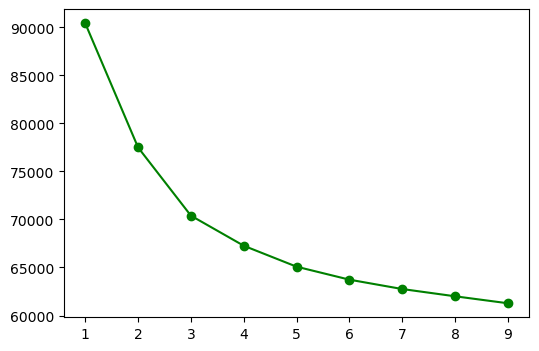

In [31]:
kmeans_per_k = [KMeans(n_clusters=k).fit(data) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(6,4))
plt.plot(range(1,10), inertias, "go-")
plt.show()

*Para cada k =  2  el promedio de la silueta es de:  0.13083324237046381
 - Para i =  1  la silueta del cluster vale:  0.09911506648716614
 - Para i =  2  la silueta del cluster vale:  0.19081293605436117


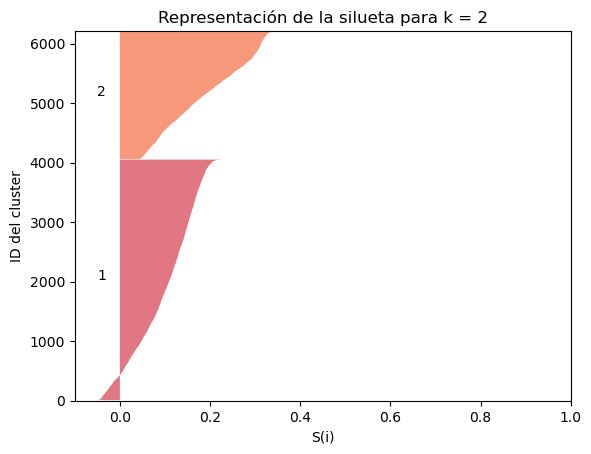

*Para cada k =  3  el promedio de la silueta es de:  0.12780034581830862
 - Para i =  1  la silueta del cluster vale:  0.1002711594699096
 - Para i =  2  la silueta del cluster vale:  0.2098345172141124
 - Para i =  3  la silueta del cluster vale:  0.09835238153857691


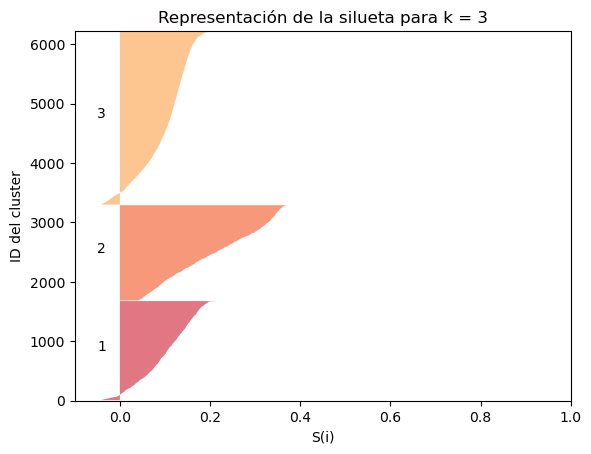

*Para cada k =  4  el promedio de la silueta es de:  0.09540602539577947
 - Para i =  1  la silueta del cluster vale:  0.0665519518510065
 - Para i =  2  la silueta del cluster vale:  0.06413467582503463
 - Para i =  3  la silueta del cluster vale:  0.08986395977408318
 - Para i =  4  la silueta del cluster vale:  0.21385467724389795


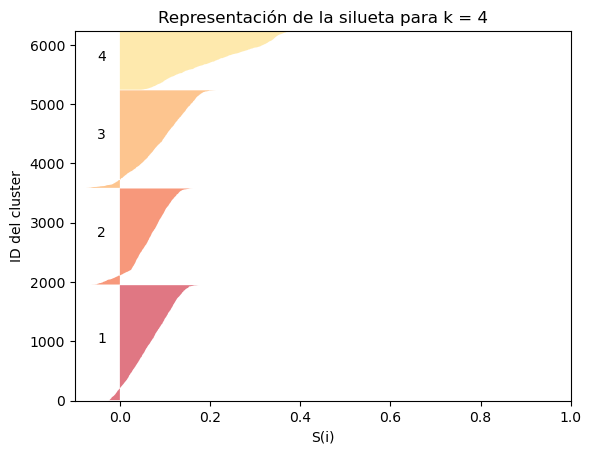

*Para cada k =  5  el promedio de la silueta es de:  0.08980131642262874
 - Para i =  1  la silueta del cluster vale:  0.06109327991504643
 - Para i =  2  la silueta del cluster vale:  0.06781501461870504
 - Para i =  3  la silueta del cluster vale:  0.25581438688417235
 - Para i =  4  la silueta del cluster vale:  0.0747408148612316
 - Para i =  5  la silueta del cluster vale:  0.06190833067352459


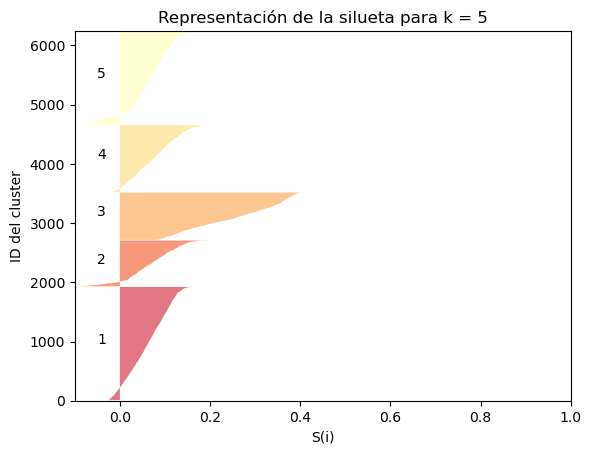

*Para cada k =  6  el promedio de la silueta es de:  0.07102518366598942
 - Para i =  1  la silueta del cluster vale:  0.07168528343135074
 - Para i =  2  la silueta del cluster vale:  0.03994292355081527
 - Para i =  3  la silueta del cluster vale:  0.26087524292511505
 - Para i =  4  la silueta del cluster vale:  0.06334769840179444
 - Para i =  5  la silueta del cluster vale:  0.05775742532968466
 - Para i =  6  la silueta del cluster vale:  0.035959258572993855


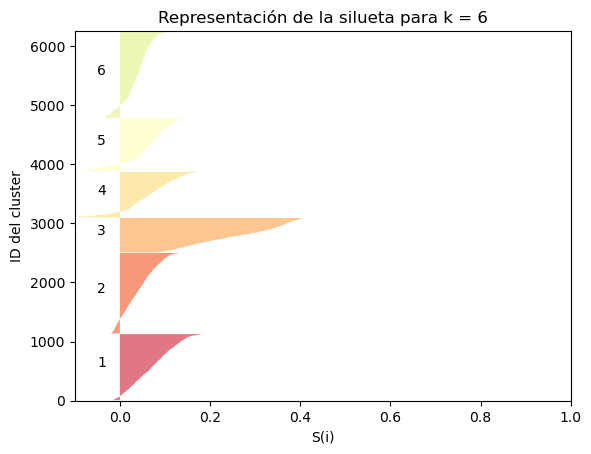

*Para cada k =  7  el promedio de la silueta es de:  0.06833711519535739
 - Para i =  1  la silueta del cluster vale:  0.06966528038560622
 - Para i =  2  la silueta del cluster vale:  0.0821707812845503
 - Para i =  3  la silueta del cluster vale:  0.06173868704062134
 - Para i =  4  la silueta del cluster vale:  0.012826299188983743
 - Para i =  5  la silueta del cluster vale:  0.056097818798922734
 - Para i =  6  la silueta del cluster vale:  0.02630305424319916
 - Para i =  7  la silueta del cluster vale:  0.26154499301928885


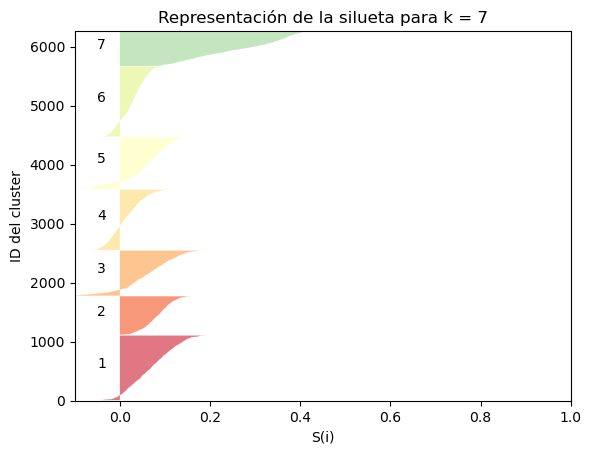

*Para cada k =  8  el promedio de la silueta es de:  0.06737174359115387
 - Para i =  1  la silueta del cluster vale:  0.061924803385246315
 - Para i =  2  la silueta del cluster vale:  0.05956024328659357
 - Para i =  3  la silueta del cluster vale:  0.07070396612996413
 - Para i =  4  la silueta del cluster vale:  -0.0008558052002412199
 - Para i =  5  la silueta del cluster vale:  0.010010060110260843
 - Para i =  6  la silueta del cluster vale:  0.06767959201554549
 - Para i =  7  la silueta del cluster vale:  0.26078946131993525
 - Para i =  8  la silueta del cluster vale:  0.07961668694722261


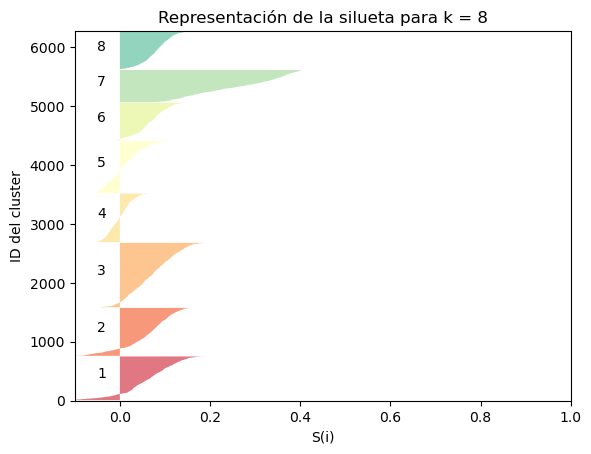

*Para cada k =  9  el promedio de la silueta es de:  0.05982210079593418
 - Para i =  1  la silueta del cluster vale:  0.04004082604362461
 - Para i =  2  la silueta del cluster vale:  0.07873502959470338
 - Para i =  3  la silueta del cluster vale:  0.2777220215020886
 - Para i =  4  la silueta del cluster vale:  -0.001478478358506858
 - Para i =  5  la silueta del cluster vale:  0.010871922047333815
 - Para i =  6  la silueta del cluster vale:  0.038640524360796014
 - Para i =  7  la silueta del cluster vale:  0.06778904130906749
 - Para i =  8  la silueta del cluster vale:  0.04957523677320209
 - Para i =  9  la silueta del cluster vale:  0.05891583847089373


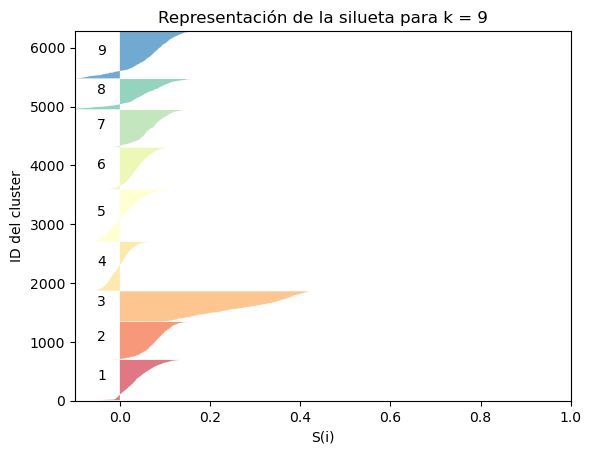

In [32]:
color_palette = [plt.cm.Spectral(float(i)/10) for i in range(1,10)]

for k in range(1,10):
    kmeanmodel = KMeans(n_clusters=k).fit(data)
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    labels = kmeanmodel.labels_
    
    if 1<k<len(data):
        _,axis1 = plt.subplots(1,1)
        
        axis1.set_xlim([-0.1,1.0])
        axis1.set_ylim([0, len(data)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(data,labels)
        print("*Para cada k = ",k," el promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(data,labels)
        
        y_lower = 10
        for i in range(k):
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print(" - Para i = ",i+1,
                 " la silueta del cluster vale: ",
                 np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0 ,ith_cluster_sv,
                                facecolor=color, alpha=0.7)
            
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            y_lower = y_upper + 10
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        
        plt.show()
            

### La cantidad de clusters que mejor se ajusta a los datos es 3, pero a motivos de ajustar los clusters a los 4 grupos de personas es que elijo 4 clusters y no 3.

In [33]:
kmean = KMeans(n_clusters=4).fit_predict(data)

In [34]:
clust_k = pd.Series(kmean)

In [35]:
data_clust_k = data.copy()

In [36]:
data_clust_k["clust_k"] = clust_k
data_clust_k.head()

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest210,interest211,interest212,interest215,interest216,group_C,group_I,group_P,group_R,clust_k
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0.0
1,1,1,0,0,1,0,0,0,0,1,...,1,0,0,1,1,1,0,0,0,1.0
2,0,0,0,0,1,0,0,1,0,1,...,1,0,0,1,1,1,0,0,0,2.0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,1,0,0,0,2.0
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,0,0,0,2.0


### Eliminamos aquellas observaciones que han quedado fuera de la clasificación por k-means.

In [37]:
data_clust_k[data_clust_k["clust_k"].isna()]

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest210,interest211,interest212,interest215,interest216,group_C,group_I,group_P,group_R,clust_k
6181,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,NaN
6182,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,NaN
6183,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,1,0,0,NaN
6184,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
6185,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,0,0,1,1,1,0,1,1,1,1,...,1,1,0,1,1,0,1,0,0,NaN
6336,0,0,1,0,1,0,1,1,0,1,...,1,0,0,1,1,0,1,0,0,NaN
6337,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,NaN
6338,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,0,0,NaN


In [38]:
data_clust_k = data_clust_k[data_clust_k["clust_k"].notna()]

In [39]:
data_clust_k.groupby("clust_k").size()

clust_k
0.0     953
1.0    1594
2.0    1585
3.0    1893
dtype: int64

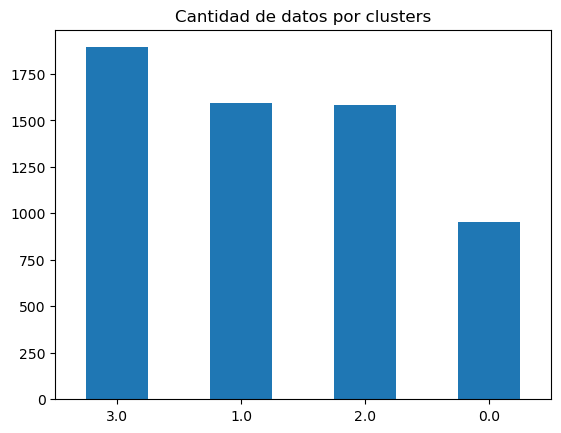

In [40]:
data_clust_k["clust_k"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Cantidad de datos por clusters")
plt.show()

In [41]:
percent_data_group_clust_k = data_clust_k["clust_k"].value_counts().div(data_clust_k["clust_k"].value_counts().sum(axis=0),axis=0)
percent_data_group_clust_k

3.0    0.314191
1.0    0.264564
2.0    0.263071
0.0    0.158174
Name: clust_k, dtype: float64

### Clustering jerárquico

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
data_clust_h = data.copy()

In [44]:
Z = linkage(data_clust_h, "ward")

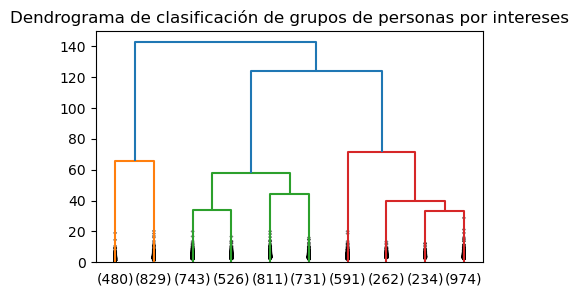

In [45]:
plt.figure(figsize=(5,3))
plt.title("Dendrograma de clasificación de grupos de personas por intereses")
dendrogram(Z, leaf_font_size=10, truncate_mode="lastp",
          p=10, show_leaf_counts=True, show_contracted=True)
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
hierarchy = AgglomerativeClustering(n_clusters=4,
                                linkage="ward").fit_predict(data_clust_h)

In [48]:
clust_h = pd.Series(hierarchy)

In [49]:
data_clust_h["clust_h"] = clust_h

In [50]:
data_clust_h.head()

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest210,interest211,interest212,interest215,interest216,group_C,group_I,group_P,group_R,clust_h
0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0.0
1,1,1,0,0,1,0,0,0,0,1,...,1,0,0,1,1,1,0,0,0,1.0
2,0,0,0,0,1,0,0,1,0,1,...,1,0,0,1,1,1,0,0,0,2.0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,1,0,0,0,1.0
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,1,0,0,0,2.0


### Eliminamos aquellas observaciones que han quedado fuera de la clasificación por clustering jerárquico.

In [51]:
data_clust_h[data_clust_h["clust_h"].isna()]

,interest1,interest5,interest6,interest9,interest12,interest14,interest15,interest16,interest17,interest21,...,interest210,interest211,interest212,interest215,interest216,group_C,group_I,group_P,group_R,clust_h
6181,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,NaN
6182,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,NaN
6183,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,1,0,0,NaN
6184,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
6185,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,0,0,1,1,1,0,1,1,1,1,...,1,1,0,1,1,0,1,0,0,NaN
6336,0,0,1,0,1,0,1,1,0,1,...,1,0,0,1,1,0,1,0,0,NaN
6337,0,0,1,0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,NaN
6338,0,0,1,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,0,0,NaN


In [52]:
data_clust_h = data_clust_h[data_clust_h["clust_h"].notna()]

In [53]:
data_clust_h.groupby("clust_h").size()

clust_h
0.0    1274
1.0    1433
2.0    2749
3.0     569
dtype: int64

In [54]:
percent_data_group_clust_h = data_clust_h["clust_h"].value_counts().div(data_clust_h["clust_h"].value_counts().sum(axis=0),axis=0)
percent_data_group_clust_h

2.0    0.456266
1.0    0.237842
0.0    0.211452
3.0    0.094440
Name: clust_h, dtype: float64

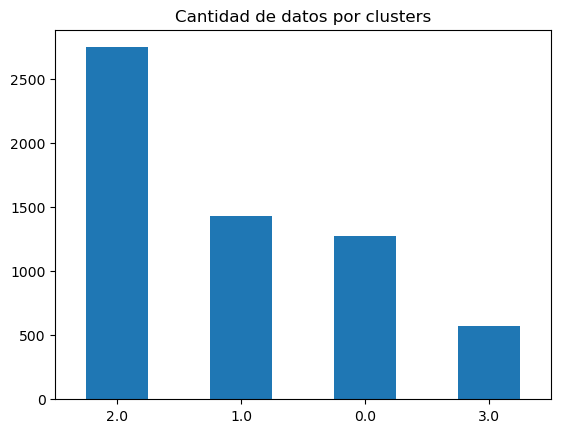

In [55]:
data_clust_h["clust_h"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Cantidad de datos por clusters")
plt.show()